# Cyber Security Breaches
The dataset I choose was on the cyber security breaches involving health care records of 500 or more people reported to the U.S. Department of Health and Human Services (HHS) as of June 27, 2014. The dataset contains 1055 observations with 13 variables: 
1.	**Name of Covered Entity**: factor giving the name of the entity experiencing the breach
2.	**State**: Factor giving the 2-letter code of the state where the breach occurred. This has 52 levels for the 50 states plus the District of Columbia (DC) and Puerto Rico (PR).
3.	**Business Associate Involved**: Factor giving the name of a subcontractor (or blank) associated with the breach.
4.	**Individuals Affected**: integer number of humans whose records were compromised in the breach. This is 500 or greater; U.S. law requires reports of breaches involving 500 or more records but not of breaches involving fewer.
5.	**Date of Breach**: character vector giving the date or date range of the breach. Recodes as Dates in breach_start and breach_end.
6.	**Type of Breach**: factor with 29 levels giving the type of breach (e.g., "Theft" vs. "Unauthorized Access/Disclosure", etc.)
7.	**Location of Breached Information**: factor with 41 levels coding the location from which the breach occurred (e.g., "Paper", "Laptop", etc.)
8.	**Date Posted or Updated**: Date the information was posted to the HHS data base or last updated.
9.	**Summary**: character vector of a summary of the incident.
10.	**Breach Start**: Date of the start of the incident = first date given in Date_of_Breach above.
11.	**Breach End**: Date of the end of the incident or NA if only one date is given in Date_of_Breach above. 
12.	**Year**: integer giving the year of the breach

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

data = pd.read_csv("breaches.csv")
data = data.fillna('NA')
data.head()

,Name of Covered Entity,State,Business Associate Involved,Individuals Affected,Date of Breach,Type of Breach,Location of Breached Information,Date Posted or Updated,Summary,Breach Start,Breach End,Year
0,Brooke Army Medical Center,TX,NA,1000,10/16/2009,Theft,Paper,6/30/2014,A binder containing the protected health infor...,10/16/2009,NA,2009
1,"Mid America Kidney Stone Association, LLC",MO,NA,1000,9/22/2009,Theft,Network Server,5/30/2014,Five desktop computers containing unencrypted ...,9/22/2009,NA,2009
2,Alaska Department of Health and Social Services,AK,NA,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",1/23/2014,NA,10/12/2009,NA,2009
3,Health Services for Children with Special Need...,DC,NA,3800,10/9/2009,Loss,Laptop,1/23/2014,A laptop was lost by an employee while in tran...,10/9/2009,NA,2009
4,"L. Douglas Carlson, M.D.",CA,NA,5257,9/27/2009,Theft,Desktop Computer,1/23/2014,A shared Computer that was used for backup was...,9/27/2009,NA,2009


In [2]:
# Get the top ten affected individuals by state
topTen = data.groupby(
    'State', 
    as_index=None
 ).agg({"Individuals Affected":"sum"})

topTen.sort_values(
    "Individuals Affected", 
    ascending= False,
    ignore_index=True
).head(10)

,State,Individuals Affected
0,VA,5110781
1,CA,4672091
2,IL,4402934
3,FL,2840764
4,NY,2571302
5,PR,1404085
6,TN,1169232
7,TX,1078861
8,AL,980780
9,MA,959674


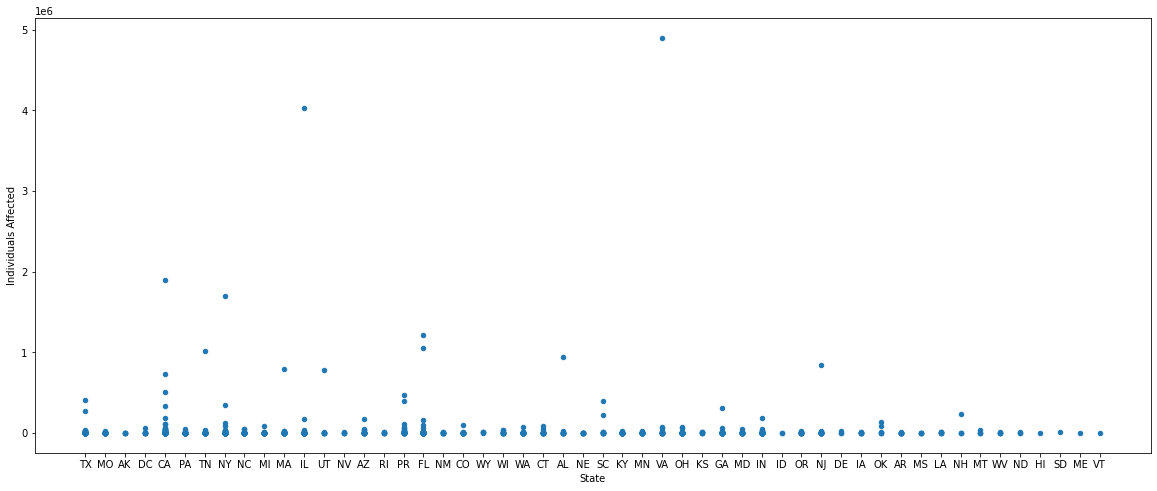

In [3]:
data[['State','Individuals Affected']].plot(
 kind='scatter',
 x='State',
 y='Individuals Affected',
 figsize=(20, 8),
)

In [4]:
#Data breaches by the number of individuals affected
typeOfBreach = data.groupby(
    'Type of Breach', 
    as_index=None).agg({"Individuals Affected":"sum"})

typeOfBreach.sort_values(
    "Individuals Affected", 
    ascending= False,
    ignore_index=True)

,Type of Breach,Individuals Affected
0,Theft,16515554
1,Loss,7254286
2,Unknown,1918312
3,Hacking/IT Incident,1878870
4,Unauthorized Access/Disclosure,1424227
5,Other,772500
6,Improper Disposal,671594
7,"Unauthorized Access/Disclosure, Hacking/IT Inc...",551355
8,"Unknown, Other",317082
9,"Unauthorized Access/Disclosure, Other",162781


## Data visualizations

In [5]:
alt.Chart(data).mark_bar().encode(
    x="Type of Breach",
    y="Location of Breached Information",
    color=alt.Color('Type of Breach', scale=alt.Scale(scheme='rainbow')),
    tooltip=["State", "Individuals Affected"]
)

alt.Chart(...)

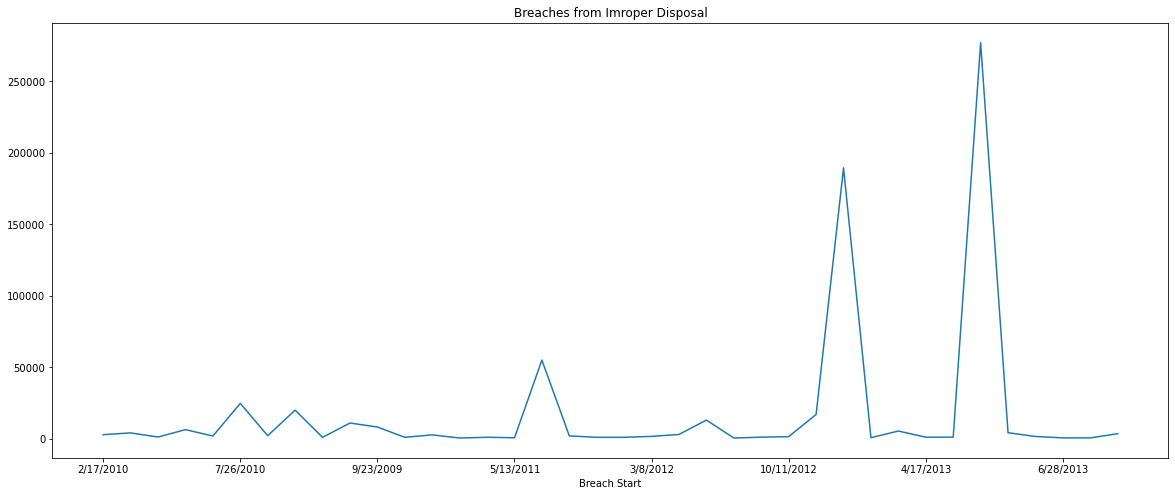

In [6]:
data[data['Type of Breach'] == 'Improper Disposal'].set_index(
     'Breach Start',)['Individuals Affected'].plot(
 kind='line',
 title= "Breaches from Imroper Disposal",
 figsize=(20,8)
)

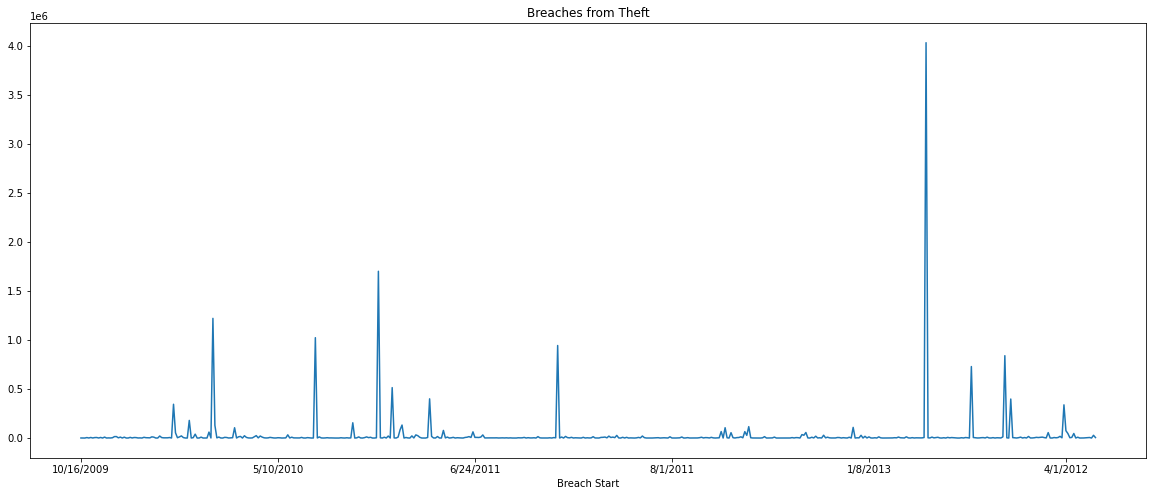

In [7]:
data[data['Type of Breach'] == 'Theft'].set_index(
     'Breach Start',)['Individuals Affected'].plot(
 kind='line',
 title= "Breaches from Theft",
 figsize=(20,8)
)

### Recap of Goals & Tasks
Why is a task pursued? (goal)
- To communicate the information from a dataset in a way that is easy to understand the data  

How is a task conducted? (means)
- The task is conducted with Altair on the Jupyter notebook  

What does a task seek to learn about the data? (characteristics)
- Which from of breach affects the most individuals  

Where does the task operate? (target data)
- The tasks will operate in the absolute reference  

When is the task performed? (workflow)
- In the exploratory stage prior to building the model   

Who is executing the task? (roles)
- This will be executed by a student pursing a data science degree  

### Evaluation 
The target questions you want to answer  
* For the breach that had the greatest number of individuals affected what was the source (i.e., laptop, mobile device)?   
* Which year had the highest increase in breaches by theft and what could have played a factor for this spike?    
* Can improper disposal of computer equipment lead to a cybersecurity breach?    

The people you would recruit to answer that question
* I can ask the general public around my community as well as colleagues from work  

The kinds of measures you would use to answer your data (e.g., insight depth, use cases, accuracy) and what these measures would tell you about the core question. 
* Participants would read the questions and use the visualizations to find the answers.

The approach you will use to answer that question (e.g., a journaling study, a formal experiment, etc.) 
* I would use a journaling study to get what the participants have observed when going through the evaluation

How you would instantiate those methods (i.e., what would your participants do?)  
* Those that have accepted to preform the survey of questions will use the created visuals to answer the questions mentioned earlier

What criteria would you use to indicate that your visualization was successful?
* If the participants can accurately answer the questions with the provided visuals 

### Conclusion
With my methods to create the visualizations I started off with getting the states with the highest number of affected individuals. The top three states were Virginia, California, and Illinois with 5110781, 4672091, 4402934 total individuals affected respectively. I then wanted to see which year had the highest spike in cybersecurity breaches by theft and this led to 2013 (peak was in the month of May). From this data only there is no concrete evidence to understand why this year had such an uptick in breaches. And lastly improper disposal of computer equipment has contributed to breaches that have affected a total of 671,594 individuals.

From my evaluations I received some feedback as to how I can make the visuals just a little bit better by adding some interactions for users to “play with the data view” and to remove the redundant data in respect to the types of data breach. What worked well was the simple data tables that consisted of state, individuals affected, and type of breach. The line plot to show the historical timeline of security breaches got more positive reviews than I initial thought from the participants. In closing, I found this feedback to be great and will further make refinements to the data visualizations with more evaluations. 